In [2]:
import quanguru as qg
import numpy as np
import matplotlib.pyplot as plt
import platform

# 13 - Multi-parameter sweep (simultaneously)

In the previous tutorial, we covered multi-parameter sweep for the simulation of a single qubit with two terms in its Hamiltonian, and we set `multiParam=True` to label that the it was a multi-parameter sweep.
`multiParam` is `False` by default, and it is useful mainly with composite quantum system or simultaneous simulation of multiple systems (which are covered later).
In this tutorial, just for demonstration purpose, we explain the `multiParam=False` with the previous qubit simulation.
All the rest of the simulation is the same, we just remove `multiParam=True`, but we then need to make some relevant changes to `sweepList` as discussed below.

Again, we will evolve a qubit under the unitary dynamics of the Hamiltonian $H=\frac{1}{2}f_{z}\sigma_{z} + f_{x}\sigma_{x} = f_{z}J_{z} + f_{x}\sigma_{x}$ with the initial state set to the equal superposition of $|1\rangle$ and $|0\rangle$.
We also set the total simulation time (with `simTotalTime`) and the step size (`simStepSize`) as well as the `compute` function where we compute the expectation value of $\sigma_{x}$.

In [3]:
# create the qubit and set its initial state and frequency
qub = qg.Qubit(frequency = 1)
qub.initialState = [1, 0]

# set the simulation time and step size
qub.simTotalTime = 8*np.pi
qub.simStepSize = 0.1

# create the operators for which we compute the expectation values
sigmaX = qg.sigmax()

# write a compute function that takes two arguments: (i) a quantum-system (qsys) and (ii) a state
# compute whatever we want and store in .results
def compute(qsys, state):
    qsys.results['sigmax expectation'].append(qg.expectation(sigmaX, state))

# set the compute attribute of our qubit to compute function
qub.compute = compute

# add the second term
secondTerm = qub.createTerm(operator=qg.sigmax, frequency=1)

The sweeps are created similarly to the previous tutorial, but we removed `multiParam=True`. Now, the sweeps will not create a nested-loop (to run the simulation for every parameter combination), but they will run simultaneously inside the same loop, therefore, the lengths of the `sweepList` need to be the same. Also, since they run simultaneously inside the same loop, the order in which they are created does not matter.

In [4]:
# create a sweep for the the second term
freqSweepSecondTerm = qub.simulation.Sweep.createSweep(system=secondTerm, sweepKey="frequency", sweepList=np.arange(-1, 1, 0.02))
# create a sweep for the qubit frequency
freqSweepFirstTerm = qub.simulation.Sweep.createSweep(system=qub, sweepKey="frequency", sweepList=np.arange(-1, 1, 0.02))

At this point, all the essential information are set, and we can run the simulation by `qub.runSimulation()`.
We again set `simDelState = True` (to discard the states) and `p = True` (for multi-processing of the sweep).

<span style="color:red" font-weight="bold"> IMPORTANT NOT FOR WINDOWS USERS : MULTI-PROCESSING (p=True) DOES NOT WORK WITH NOTEBOOK

You can use a python script, but you will need to make sure that the critical parts of the code are under ``` if __name__ == "__main__": ``` We are going to add further tutorials for this later.

In [5]:
qub.simDelStates = True
states = qub.runSimulation(p=(platform.system() != 'Windows'))

Now, we receive the `results` that we stored again as `qub.results['sigmax expectation']`, which returns a list of list, each of which is a time trace corresponding to the frequencies swept for $f_{z}$  and $f_{x}$.

As expected, the expectation value of $\sigma_{x}$ oscillates with different frequencies.

Text(0, 0.5, 'Time')

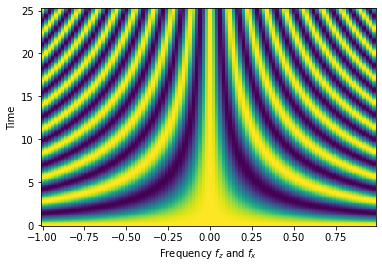

In [6]:
Y, X = np.meshgrid(qub.simulation.timeList, freqSweepFirstTerm.sweepList)
plt.pcolormesh(X, Y, qub.results['sigmax expectation'])

plt.xlabel("Frequency $f_{z}$ and $f_{x}$")
plt.ylabel("Time")

Now, we receive the `results` that we stored again as `qub.results['sigmax expectation'][1]` for the second $f_{x}$ value, which returns a list of list, each of which is a time trace corresponding to the frequencies swept for $f_{z}$.

As expected, the expectation value of $\sigma_{x}$ oscillates with different frequencies.